In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import files
#files.upload()

#Lendo o arquivo USA_Housing.csv
df = pd.read_csv ('HepatitisCdata.csv')

#Exibindo as colunas do dataframe
df

Saving HepatitisCdata.csv to HepatitisCdata (1).csv


,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [16]:
df = df.drop('Unnamed: 0', axis=1)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [17]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [18]:
# Substituindo valores faltantes pela média de cada coluna

df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)

In [19]:
from sklearn import preprocessing

# Criando o modelo de labelEncoder
le = preprocessing.LabelEncoder()

# Convertendo string labels para numeros.
category_encoded = le.fit_transform(df["Category"])
sex_encoded = le.fit_transform(df["Sex"])
#print(category_encoded)
#print(sex_encoded)
df['Category'] = category_encoded
df['Sex'] = sex_encoded
print(df)

     Category  Age  Sex   ALB        ALP    ALT    AST   BIL    CHE  CHOL  \
0           0   32    1  38.5   52.50000    7.7   22.1   7.5   6.93  3.23   
1           0   32    1  38.5   70.30000   18.0   24.7   3.9  11.17  4.80   
2           0   32    1  46.9   74.70000   36.2   52.6   6.1   8.84  5.20   
3           0   32    1  43.2   52.00000   30.6   22.6  18.9   7.33  4.74   
4           0   32    1  39.2   74.10000   32.6   24.8   9.6   9.15  4.32   
..        ...  ...  ...   ...        ...    ...    ...   ...    ...   ...   
610         4   62    0  32.0  416.60000    5.9  110.3  50.0   5.57  6.30   
611         4   64    0  24.0  102.80000    2.9   44.4  20.0   1.54  3.02   
612         4   64    0  29.0   87.30000    3.5   99.0  48.0   1.66  3.63   
613         4   46    0  33.0   68.28392   39.0   62.0  20.0   3.56  4.20   
614         4   59    0  36.0   68.28392  100.0   80.0  12.0   9.07  5.30   

      CREA    GGT  PROT  
0    106.0   12.1  69.0  
1     74.0   15.6  76.5

In [20]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Dividindo os dados em conjuntos de treinamento e teste
X = df.drop('Category', axis=1)
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Normalizando a formatação dos dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train, X_test, y_train, y_test)

# A partir desse ponto a base de dados já está preparada para aplicação dos
# 3 métodos de IA.

[[ 0.66023098  0.79318287  0.00550193 ...  0.17954155  1.0065125
   0.07414631]
 [ 0.76051923  0.79318287 -0.26897036 ... -0.20251996 -0.65075515
  -1.04072292]
 [ 0.45965448 -1.26074331 -0.44051553 ...  1.38394497  2.35163896
   1.9566304 ]
 ...
 [-0.94438102  0.79318287  0.67452812 ...  0.379669   -0.53847415
   0.75037846]
 [ 0.55994273  0.79318287  1.30924528 ...  0.45244262  0.2362648
   1.06107972]
 [-1.24524578  0.79318287  1.2234727  ...  0.14315474 -0.3992457
   0.69554882]] [[ 0.55994273 -1.26074331 -0.25181584 ... -0.22071337  1.0065125
   0.47623029]
 [ 0.55994273 -1.26074331  0.14273807 ... -0.27529359 -0.52949167
  -0.20000186]
 [-0.54322802  0.79318287  0.81176427 ...  0.10676792 -0.35882454
  -0.03551296]
 ...
 [ 0.25907798  0.79318287  0.70883716 ...  0.12496133  0.39121259
   0.40312411]
 [ 0.05850148  0.79318287  1.27493625 ... -0.09881755 -0.21061361
   0.05586976]
 [-0.54322802  0.79318287 -0.95515107 ... -0.59185884  0.52145855
  -0.62036239]] 241    0
245    0
60

In [22]:
# Criando e treinando o modelo KNN com k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Criando o vetor de previsões
y_pred = knn.predict(X_test)

# Avaliando o modelo
from sklearn import preprocessing

# Precisão geral do algoritmo KNN
accuracy = knn.score(X_test, y_test)
print("Precisão:", accuracy)

# Matriz de confusão
print("Matriz de Confusão: \n", confusion_matrix(y_test,y_pred))

Precisão: 0.8861788617886179
Matriz de Confusão: 
 [[102   0   0   0]
 [  5   1   0   2]
 [  4   2   0   0]
 [  0   1   0   6]]


         Category         Age         Sex         ALB         ALP         ALT  \
count  615.000000  615.000000  615.000000  615.000000  615.000000  615.000000   
mean     0.386992   47.408130    0.613008   41.620195   68.283920   28.450814   
std      1.052294   10.055105    0.487458    5.775920   25.643955   25.448940   
min      0.000000   19.000000    0.000000   14.900000   11.300000    0.900000   
25%      0.000000   39.000000    0.000000   38.800000   52.950000   16.400000   
50%      0.000000   47.000000    1.000000   41.900000   66.700000   23.000000   
75%      0.000000   54.000000    1.000000   45.200000   79.300000   33.050000   
max      4.000000   77.000000    1.000000   82.200000  416.600000  325.300000   

              AST         BIL         CHE        CHOL         CREA  \
count  615.000000  615.000000  615.000000  615.000000   615.000000   
mean    34.786341   11.396748    8.196634    5.368099    81.287805   
std     33.090690   19.673150    2.205657    1.123466    49.

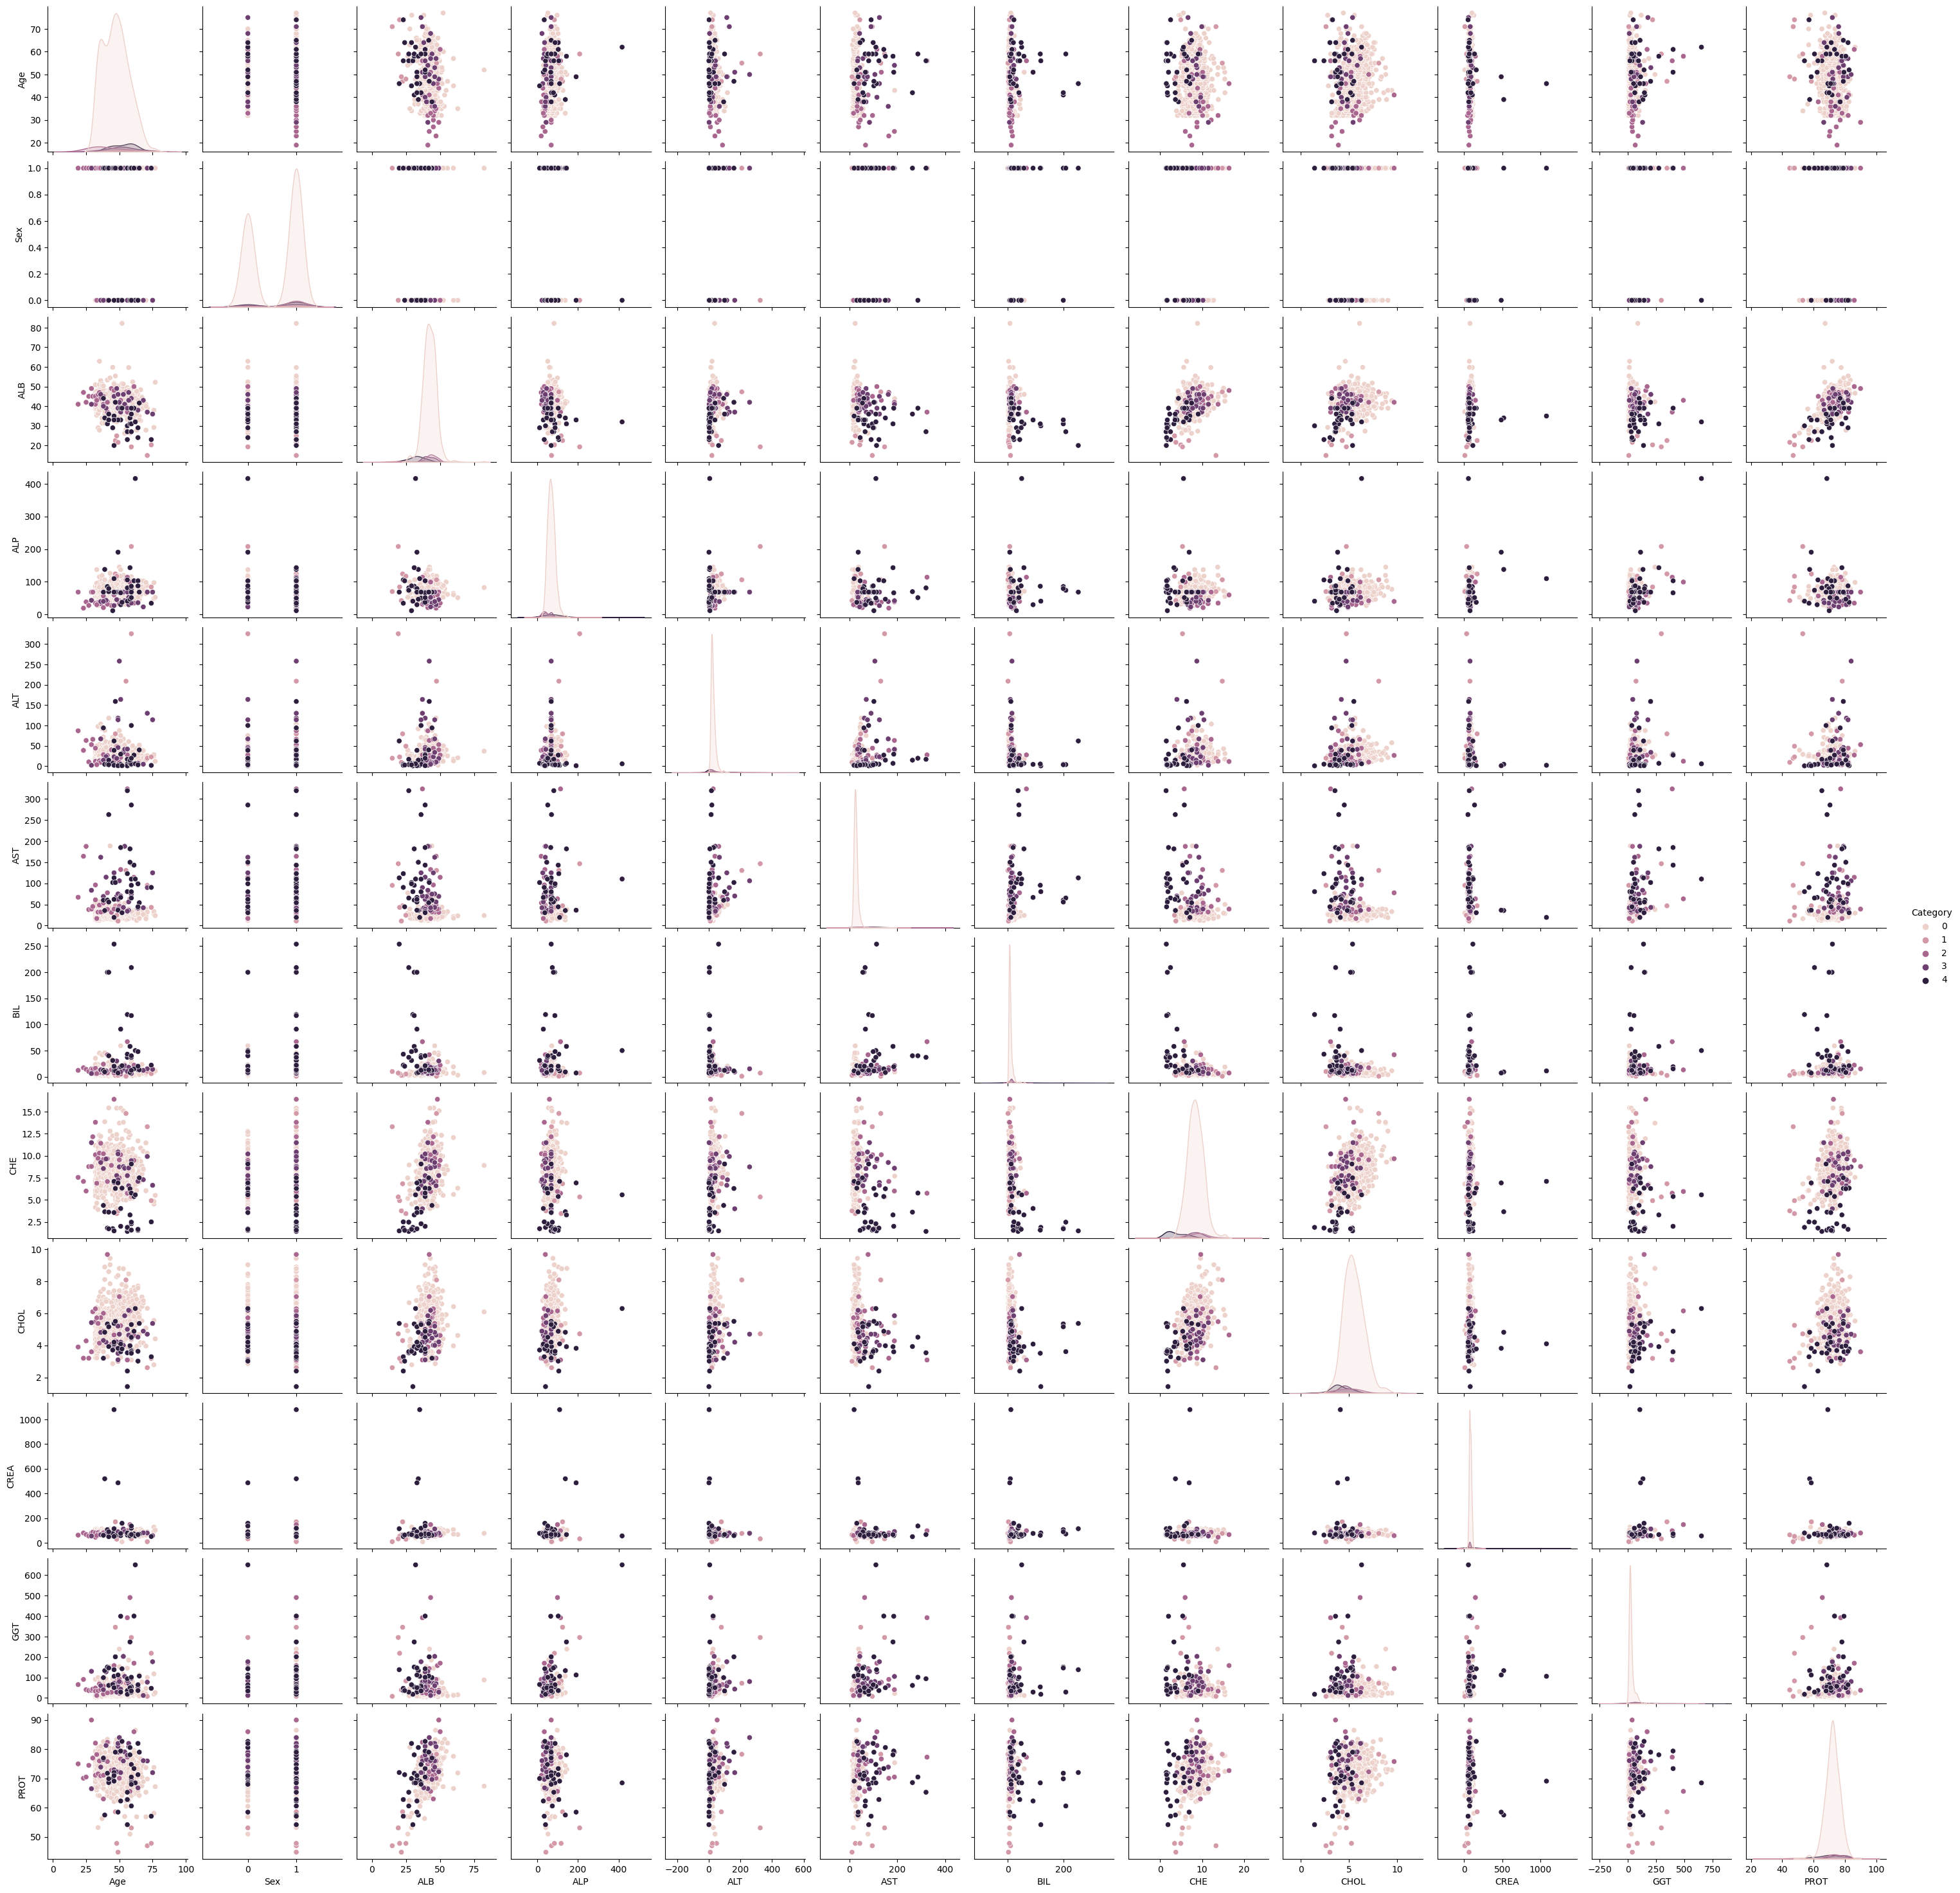

In [23]:
import seaborn as sns #visualização
from sklearn.neural_network import MLPClassifier #neural network


#Visualização

sns.pairplot(data=df, hue='Category')
print(df.describe())

#Treinando o modelo

clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50, 50), random_state=1)
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)

#Relatório de classificação
print('Relatório:\n', classification_report(y_test, prediction))
print("\nMatriz de confusão detalhada:\n",
      pd.crosstab(y_test, prediction, rownames=['Real'], colnames=['Predito'], margins=True, margins_name='Todos'))